In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [23]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=53a982d08f9754613a4653cb69cc1a81


In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [27]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [28]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1             
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [30]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | weatherford
Processing Record 4 of Set 1 | shache
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | bunbury
City not found. Skipping...
Processing Record 7 of Set 1 | berlevag
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | yumen
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | pacifica
Processing Record 12 of Set 1 | port-gentil
Processing Record 13 of Set 1 | uglegorsk
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | kostelec nad cernymi lesy
Processing Record 17 of Set 1 | sao filipe
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | orsha
Processing Record 22 of Set 1 | egvekinot
Processing Record 23 of Set

Processing Record 36 of Set 4 | lorengau
Processing Record 37 of Set 4 | alihe
Processing Record 38 of Set 4 | esperance
Processing Record 39 of Set 4 | muli
Processing Record 40 of Set 4 | fukue
Processing Record 41 of Set 4 | port pirie
Processing Record 42 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 4 | karangampel
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | olafsvik
Processing Record 46 of Set 4 | union
Processing Record 47 of Set 4 | comodoro rivadavia
Processing Record 48 of Set 4 | bengkulu
Processing Record 49 of Set 4 | dikson
Processing Record 50 of Set 4 | poum
Processing Record 1 of Set 5 | tikhvin
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | kita
Processing Record 4 of Set 5 | artyom
Processing Record 5 of Set 5 | limbang
Processing Record 6 of Set 5 | opuwo
Processing Record 7 of Set 5 | itaqui
Processing Record 8 of Set 5 | tasiilaq
Processing Record 9 of 

Processing Record 25 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 26 of Set 8 | achalpur
Processing Record 27 of Set 8 | sur
Processing Record 28 of Set 8 | cidreira
Processing Record 29 of Set 8 | zhigansk
Processing Record 30 of Set 8 | qabis
City not found. Skipping...
Processing Record 31 of Set 8 | salamanca
Processing Record 32 of Set 8 | saulkrasti
Processing Record 33 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 34 of Set 8 | matay
Processing Record 35 of Set 8 | innisfail
Processing Record 36 of Set 8 | goundi
Processing Record 37 of Set 8 | kalmunai
Processing Record 38 of Set 8 | khonuu
City not found. Skipping...
Processing Record 39 of Set 8 | vila
Processing Record 40 of Set 8 | poya
Processing Record 41 of Set 8 | harper
Processing Record 42 of Set 8 | rio grande
Processing Record 43 of Set 8 | medicine hat
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | batouri
Processing Record 46 of Set 8 | port blai

Processing Record 10 of Set 12 | racine
Processing Record 11 of Set 12 | batemans bay
Processing Record 12 of Set 12 | banes
Processing Record 13 of Set 12 | khovu-aksy
Processing Record 14 of Set 12 | east wenatchee bench
Processing Record 15 of Set 12 | paamiut
Processing Record 16 of Set 12 | uray
Processing Record 17 of Set 12 | gat
Processing Record 18 of Set 12 | neuquen
Processing Record 19 of Set 12 | zlatoustovsk
City not found. Skipping...
Processing Record 20 of Set 12 | manikganj
Processing Record 21 of Set 12 | ozinki
Processing Record 22 of Set 12 | lucea
Processing Record 23 of Set 12 | plouzane
Processing Record 24 of Set 12 | vestmanna
Processing Record 25 of Set 12 | taltal
Processing Record 26 of Set 12 | maragogi
Processing Record 27 of Set 12 | chino valley
Processing Record 28 of Set 12 | west helena
Processing Record 29 of Set 12 | oksfjord
Processing Record 30 of Set 12 | candawaga
City not found. Skipping...
Processing Record 31 of Set 12 | hervey bay
Processin

In [31]:
#check if more than 500 
len(city_data)

550

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.41,57.70,68.00,88,75,11.41,MU,2020-08-25 21:37:23
1,Airai,-8.93,125.41,53.98,67,13,5.10,TL,2020-08-25 21:37:23
2,Weatherford,32.76,-97.80,93.99,45,65,5.01,US,2020-08-25 21:33:45
3,Shache,38.42,77.24,72.72,19,67,4.85,CN,2020-08-25 21:37:24
4,Berlevag,70.86,29.09,50.00,87,40,6.93,NO,2020-08-25 21:37:24
5,Qaanaaq,77.48,-69.36,36.64,88,100,8.66,GL,2020-08-25 21:37:24
6,Yumen,40.28,97.20,66.09,26,0,1.95,CN,2020-08-25 21:37:25
7,Mataura,-46.19,168.86,39.31,84,75,5.37,NZ,2020-08-25 21:37:25
8,Pacifica,37.61,-122.49,77.00,64,20,17.22,US,2020-08-25 21:37:25
9,Port-Gentil,-0.72,8.78,75.20,94,40,8.48,GA,2020-08-25 21:35:37


In [33]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [34]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2020-08-25 21:37:23,-20.41,57.70,68.00,88,75,11.41
1,Airai,TL,2020-08-25 21:37:23,-8.93,125.41,53.98,67,13,5.10
2,Weatherford,US,2020-08-25 21:33:45,32.76,-97.80,93.99,45,65,5.01
3,Shache,CN,2020-08-25 21:37:24,38.42,77.24,72.72,19,67,4.85
4,Berlevag,NO,2020-08-25 21:37:24,70.86,29.09,50.00,87,40,6.93
5,Qaanaaq,GL,2020-08-25 21:37:24,77.48,-69.36,36.64,88,100,8.66
6,Yumen,CN,2020-08-25 21:37:25,40.28,97.20,66.09,26,0,1.95
7,Mataura,NZ,2020-08-25 21:37:25,-46.19,168.86,39.31,84,75,5.37
8,Pacifica,US,2020-08-25 21:37:25,37.61,-122.49,77.00,64,20,17.22
9,Port-Gentil,GA,2020-08-25 21:35:37,-0.72,8.78,75.20,94,40,8.48


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [37]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598392856.8951921

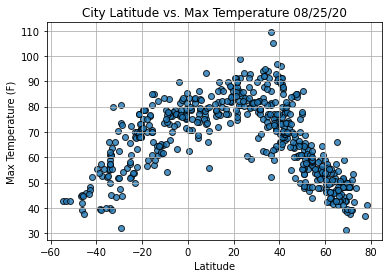

In [45]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

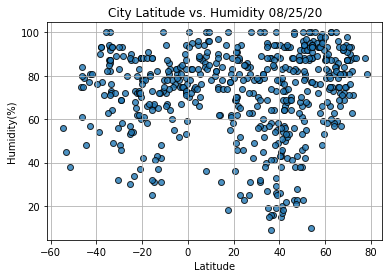

In [44]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

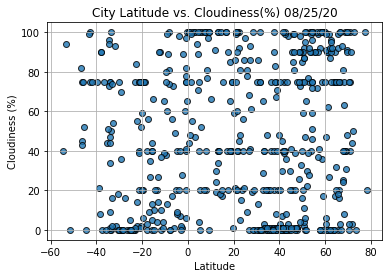

In [43]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

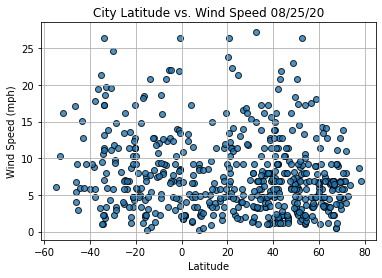

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()